In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(614, 13)

In [4]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

Let us first treat the missing values in the data

For gender column we can simply replace the missing values by the mode of the column but that will make the data more imbalanced

For the column dependents and gender we fill the missing values using 'NA' and '2'

In [44]:
df['Gender'].fillna(value='NA',inplace=True)
df['Gender'].isnull().sum()

0

In [43]:
df['Dependents'].fillna(value=2,inplace=True)
df['Dependents'].isnull().sum()


0

In [8]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               3
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

For Married we can replace the null values with the most frequently appearing variant i.e. mode of the corresponding column

In [9]:

df['Married'].fillna(df['Married'].mode()[0],inplace=True)

In [10]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
df['Self_Employed'].fillna(value='NA',inplace=True)
df['Self_Employed'].isnull().sum()


0

For the missing values in the column L0anAmount, let us first check how the values in the column are distributed

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

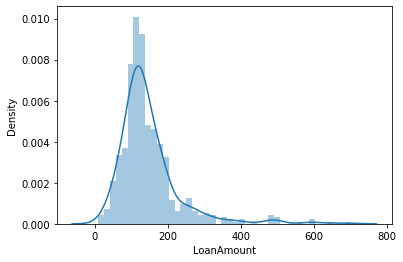

In [12]:
sns.distplot(df['LoanAmount'])

<AxesSubplot:xlabel='LoanAmount'>

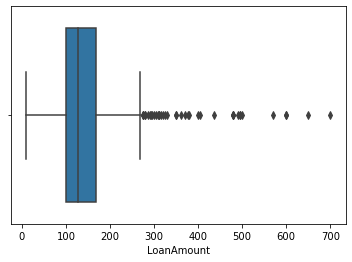

In [13]:
sns.boxplot(df['LoanAmount'])

LoanAmount is highly right skewed, so we can use the mode or median method to fill up the missing values

In [14]:
df[df["LoanAmount"] == 0]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [15]:
df['LoanAmount'].median()

128.0

In [16]:
df['LoanAmount'].mode()

0    120.0
dtype: float64

Let us fill up the missing values by the median of the column

In [17]:
df['LoanAmount'].fillna(df['LoanAmount'].median(),inplace=True)

In [18]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

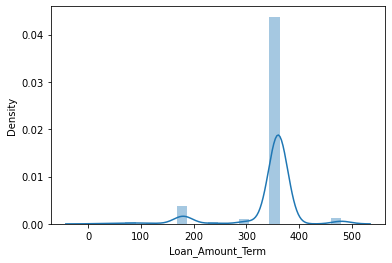

In [19]:
sns.distplot(df['Loan_Amount_Term'])

<AxesSubplot:xlabel='Loan_Amount_Term'>

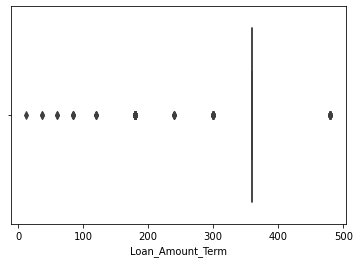

In [20]:
sns.boxplot(df['Loan_Amount_Term'])

In [21]:
df['Loan_Amount_Term'].median()

360.0

In [22]:
df['Loan_Amount_Term'].mode()

0    360.0
dtype: float64

Now I shall replace the missing values in the Loan_Amount_Term by the mode of the column 

In [23]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)

In [24]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [25]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [26]:
df[df['Credit_History']==1]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y


In [27]:
df[df['Credit_History']==0]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
17,LP001036,Female,No,0,Graduate,No,3510,0.0,76.0,360.0,0.0,Urban,N
20,LP001043,Male,Yes,0,Not Graduate,No,7660,0.0,104.0,360.0,0.0,Urban,N
22,LP001047,Male,Yes,0,Not Graduate,No,2600,1911.0,116.0,360.0,0.0,Semiurban,N
23,LP001050,NA,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
576,LP002872,NA,Yes,0,Graduate,No,3087,2210.0,136.0,360.0,0.0,Semiurban,N
584,LP002911,Male,Yes,1,Graduate,No,2787,1917.0,146.0,360.0,0.0,Rural,N
589,LP002926,Male,Yes,2,Graduate,Yes,2726,0.0,106.0,360.0,0.0,Semiurban,N
597,LP002943,Male,No,2,Graduate,No,2987,0.0,88.0,360.0,0.0,Semiurban,N


<AxesSubplot:xlabel='Credit_History', ylabel='CoapplicantIncome'>

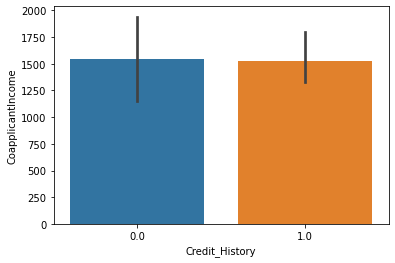

In [28]:
sns.barplot(x='Credit_History',y='CoapplicantIncome',data=df)


<AxesSubplot:xlabel='Credit_History', ylabel='ApplicantIncome'>

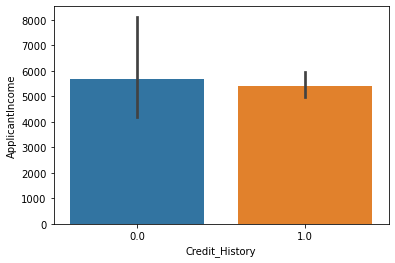

In [29]:
sns.barplot(x='Credit_History',y='ApplicantIncome',data=df)

<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

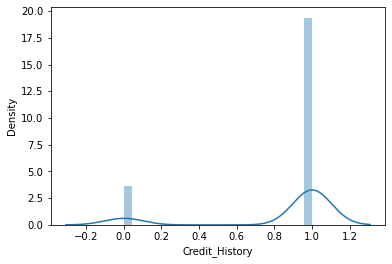

In [30]:
sns.distplot(df['Credit_History'])

We see from the above plots that Credit_History does not significantly depend on ApplicantIncome or CoapplicantIncome, Credit_history is however a highly imbalanced feature, Let us replace the missing values in this column by a new value i.e. 2

In [31]:
df['Credit_History']=(df['Credit_History'].fillna(2))

In [32]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [33]:
df.duplicated().sum()

0

In [34]:
df['Loan_ID'].nunique()

614

# EDA

As the values in Loan_ID are all unique, let us drop this column first

In [35]:
df = df.drop(columns=['Loan_ID'])

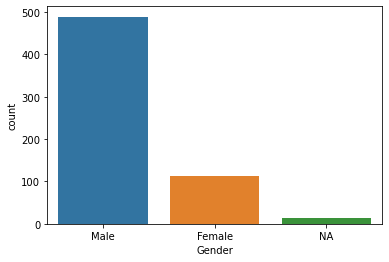

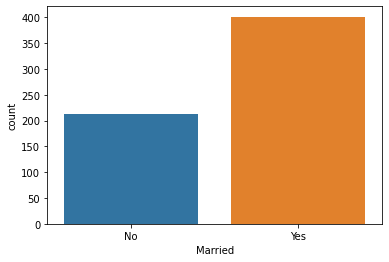

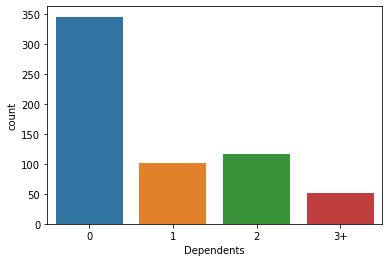

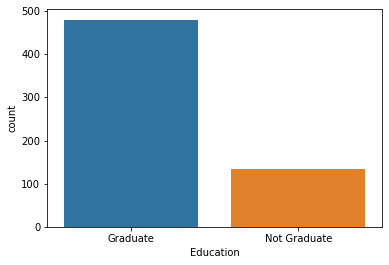

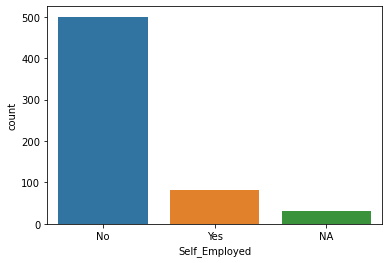

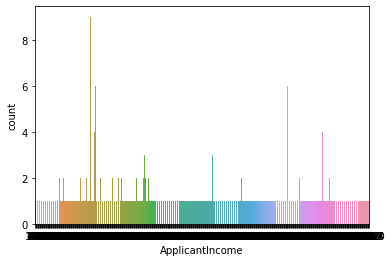

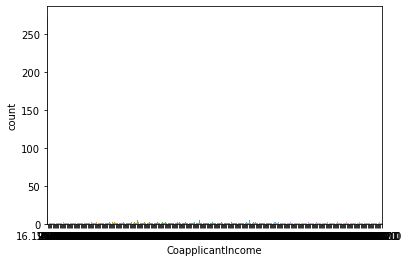

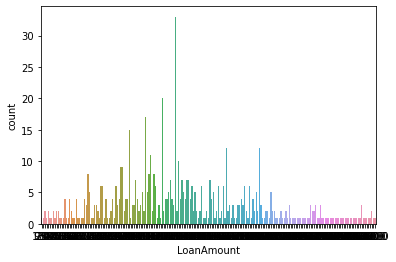

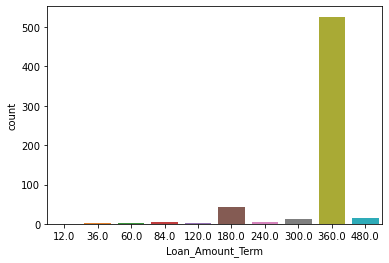

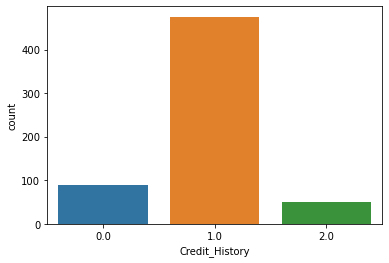

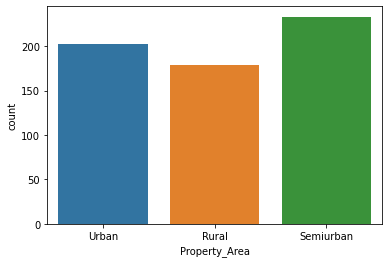

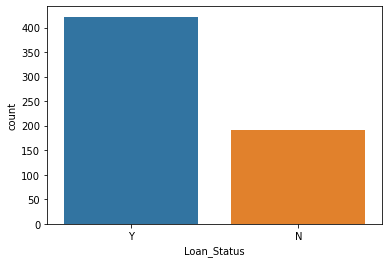

In [36]:
columns=df.columns

for i in columns:
    sns.countplot(df[i])
    plt.show()

Let us try to see which are the important features in getting the loan

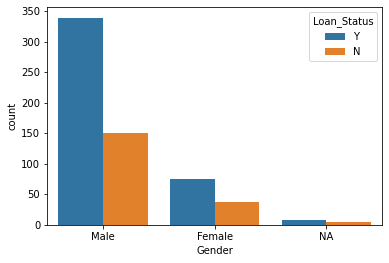

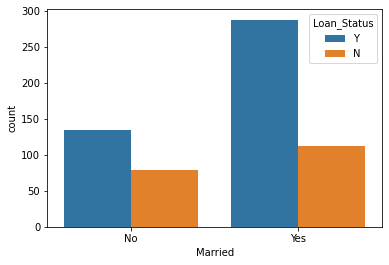

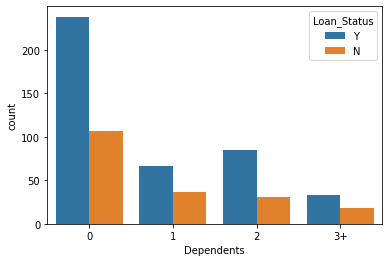

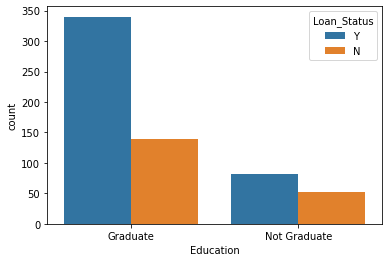

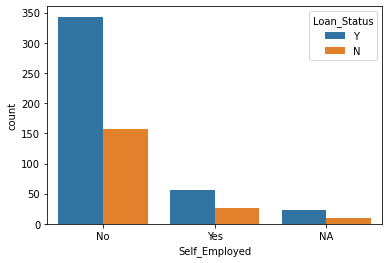

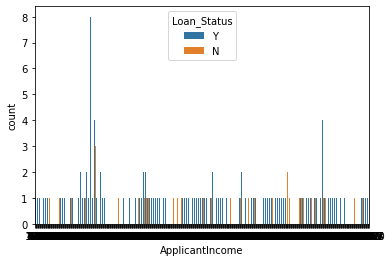

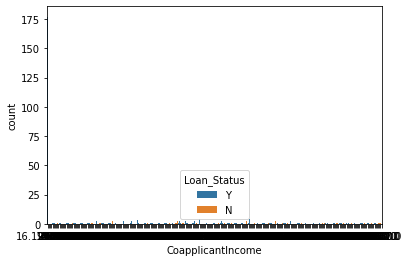

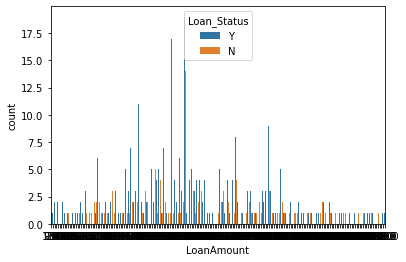

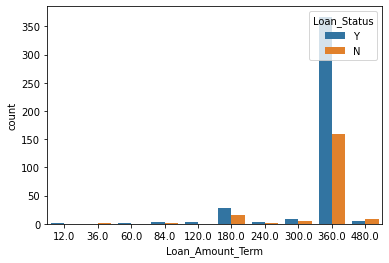

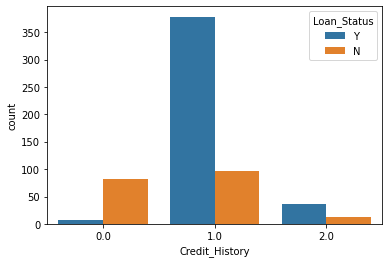

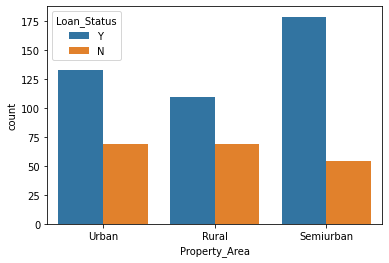

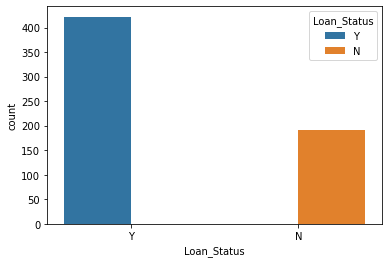

In [37]:
for i in columns:
    sns.countplot(x=df[i],hue='Loan_Status',data=df)
    plt.show()

From the above plots we see that, Male and married person has a much higher chance to get the loan; Those who have no dependants, those who are garduate are at much advantage to get the loan. People who are self-Employed are much less likely to get the loan.


Let us now check the correlation using heatmap

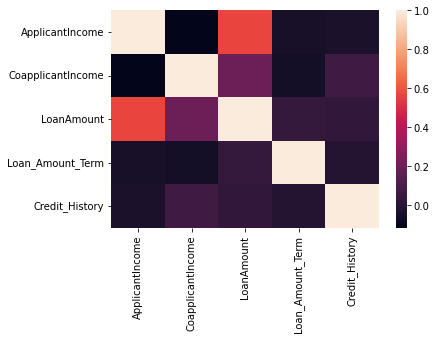

In [38]:
sns.heatmap(df.corr())
plt.show()

In [39]:
colin=df.corr().iloc[[0]]
colin


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.0,-0.116605,0.565181,-0.046531,-0.033996


Only LoanAmount & ApplicantIncome has slight correlation


Let us now convert the object data type 

In [46]:
#We will use LabelEncoder to change the data type
Object=['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status', 'Dependents']

#We will use LabelEncoder to change the data type

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for i in Object:
    df[i]=le.fit_transform(df[i])

In [41]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,1,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,1,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,2,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,1,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,1,6000,0.0,141.0,360.0,1.0,2,1


Let us now check the distribution of the features

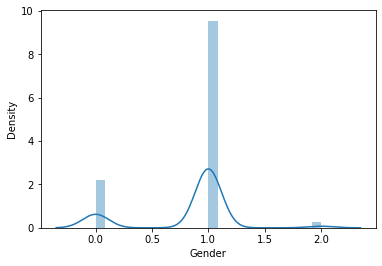

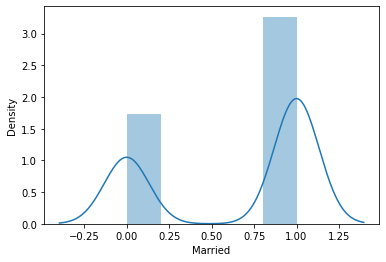

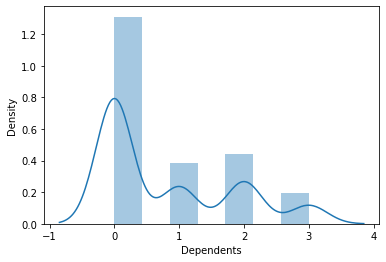

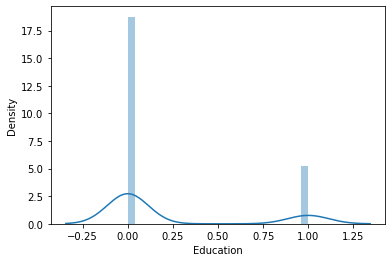

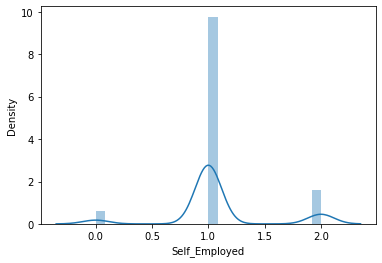

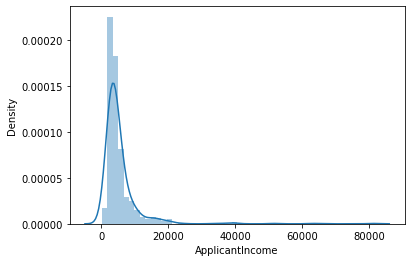

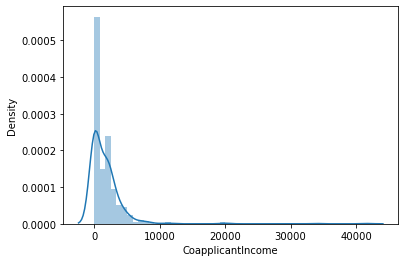

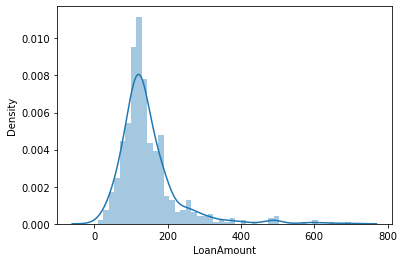

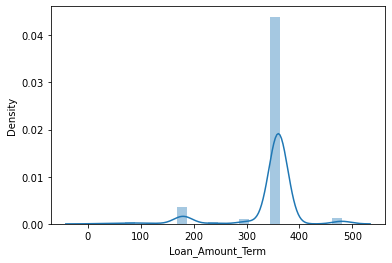

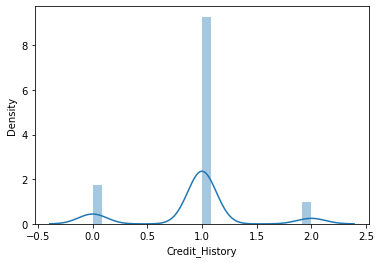

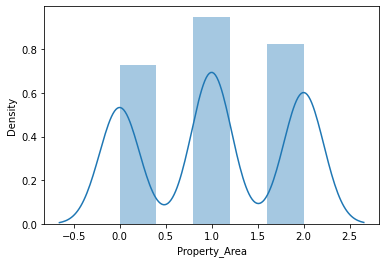

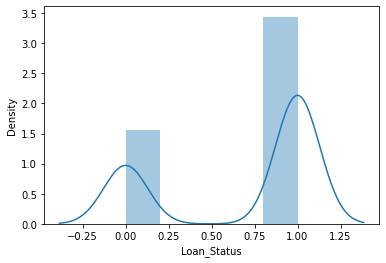

In [47]:
columns=df.columns

for i in columns:
    sns.distplot(df[i])
    plt.show()

The skewness in applicantIncome, CoapplicantIncome, LoanAmount need to be treated

In [48]:
df.skew()

Gender              -0.953015
Married             -0.644850
Dependents           0.893679
Education            1.367622
Self_Employed        0.491660
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.743053
Loan_Amount_Term    -2.402112
Credit_History      -0.199751
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

In [49]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.838762,0.653094,0.793160,0.218241,1.081433,5403.459283,1621.245798,145.752443,342.410423,0.936482,1.037459,0.687296
std,0.421752,0.476373,1.020772,0.413389,0.423472,6109.041673,2926.248369,84.107233,64.428629,0.471924,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,1.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,3812.500000,1188.500000,128.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,2.000000,0.000000,1.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,2.000000,1.000000,3.000000,1.000000,2.000000,81000.000000,41667.000000,700.000000,480.000000,2.000000,2.000000,1.000000


Since coapplicantincome has min value 0, so I shall use log1p transformation

In [51]:
col_skewd = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

for i in col_skewd:
    if df.skew().loc[i]>0.5:
        df[i]=np.log1p(df[i])

In [52]:
df.skew()

Gender              -0.953015
Married             -0.644850
Dependents           0.893679
Education            1.367622
Self_Employed        0.491660
ApplicantIncome      0.482128
CoapplicantIncome   -0.173073
LoanAmount          -0.151578
Loan_Amount_Term    -2.402112
Credit_History      -0.199751
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

In [53]:
from sklearn.preprocessing import power_transform

df['Loan_Amount_Term']=power_transform(df['Loan_Amount_Term'].to_numpy().reshape(-1, 1))
df['Education']=power_transform(df['Education'].to_numpy().reshape(-1, 1))

In [54]:
df.skew()

Gender              -0.953015
Married             -0.644850
Dependents           0.893679
Education            1.367622
Self_Employed        0.491660
ApplicantIncome      0.482128
CoapplicantIncome   -0.173073
LoanAmount          -0.151578
Loan_Amount_Term     0.392571
Credit_History      -0.199751
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

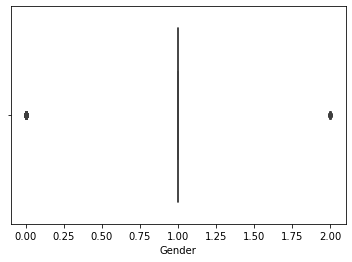

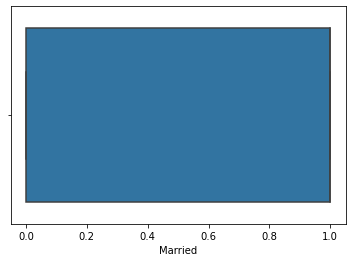

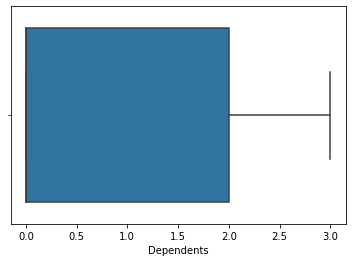

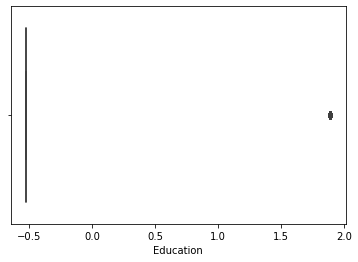

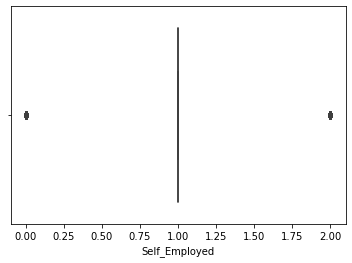

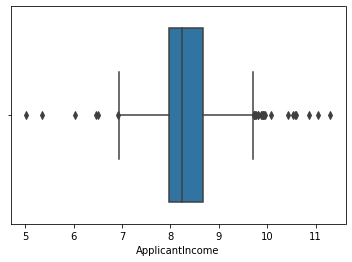

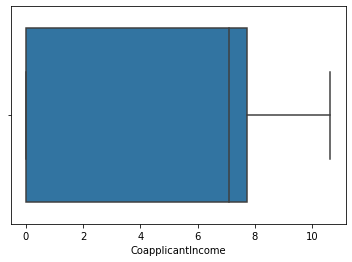

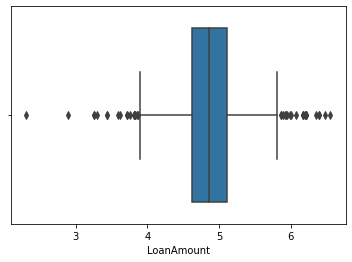

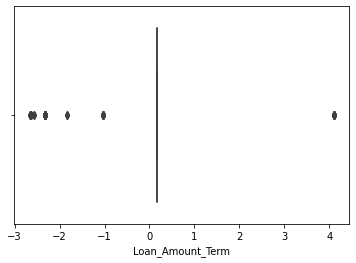

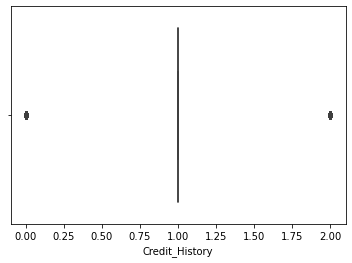

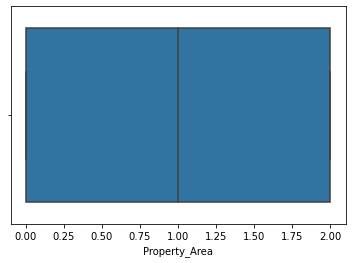

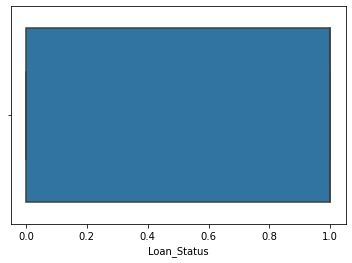

In [55]:
columns=df.columns

for i in columns:
    sns.boxplot(df[i])
    plt.show()

ApplicantIncome and LoanAmount has outliers that needs to be treated

I shall now remove outliers using standard deviation method

In [59]:
from numpy import mean
from numpy import std


columns=['ApplicantIncome','LoanAmount']

for i in columns:
    if isinstance(df[i][0], str) :
        continue
    else:
        #Calculating Mean and Std 
        mean, std = (df[i].mean(),df[i].std())
        # identify outliers
        cut_off = std*2.5
        lower, upper = mean - cut_off, mean + cut_off
        outliers = [x for x in df[i] if x < lower or x > upper]
        print('Identified outliers: %d' % len(outliers))
        df[i] = df[i].apply(lambda x: lower if x < lower else (upper if x > upper else x))



Identified outliers: 19
Identified outliers: 22


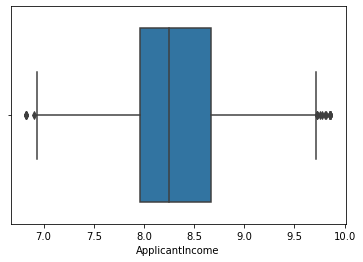

In [60]:
sns.boxplot(df['ApplicantIncome'])
plt.show()

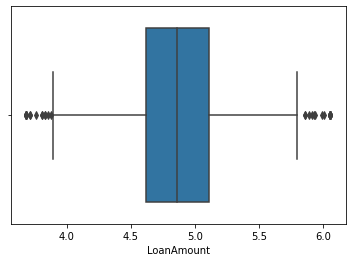

In [61]:
sns.boxplot(df['LoanAmount'])
plt.show()

Now the data should be clean

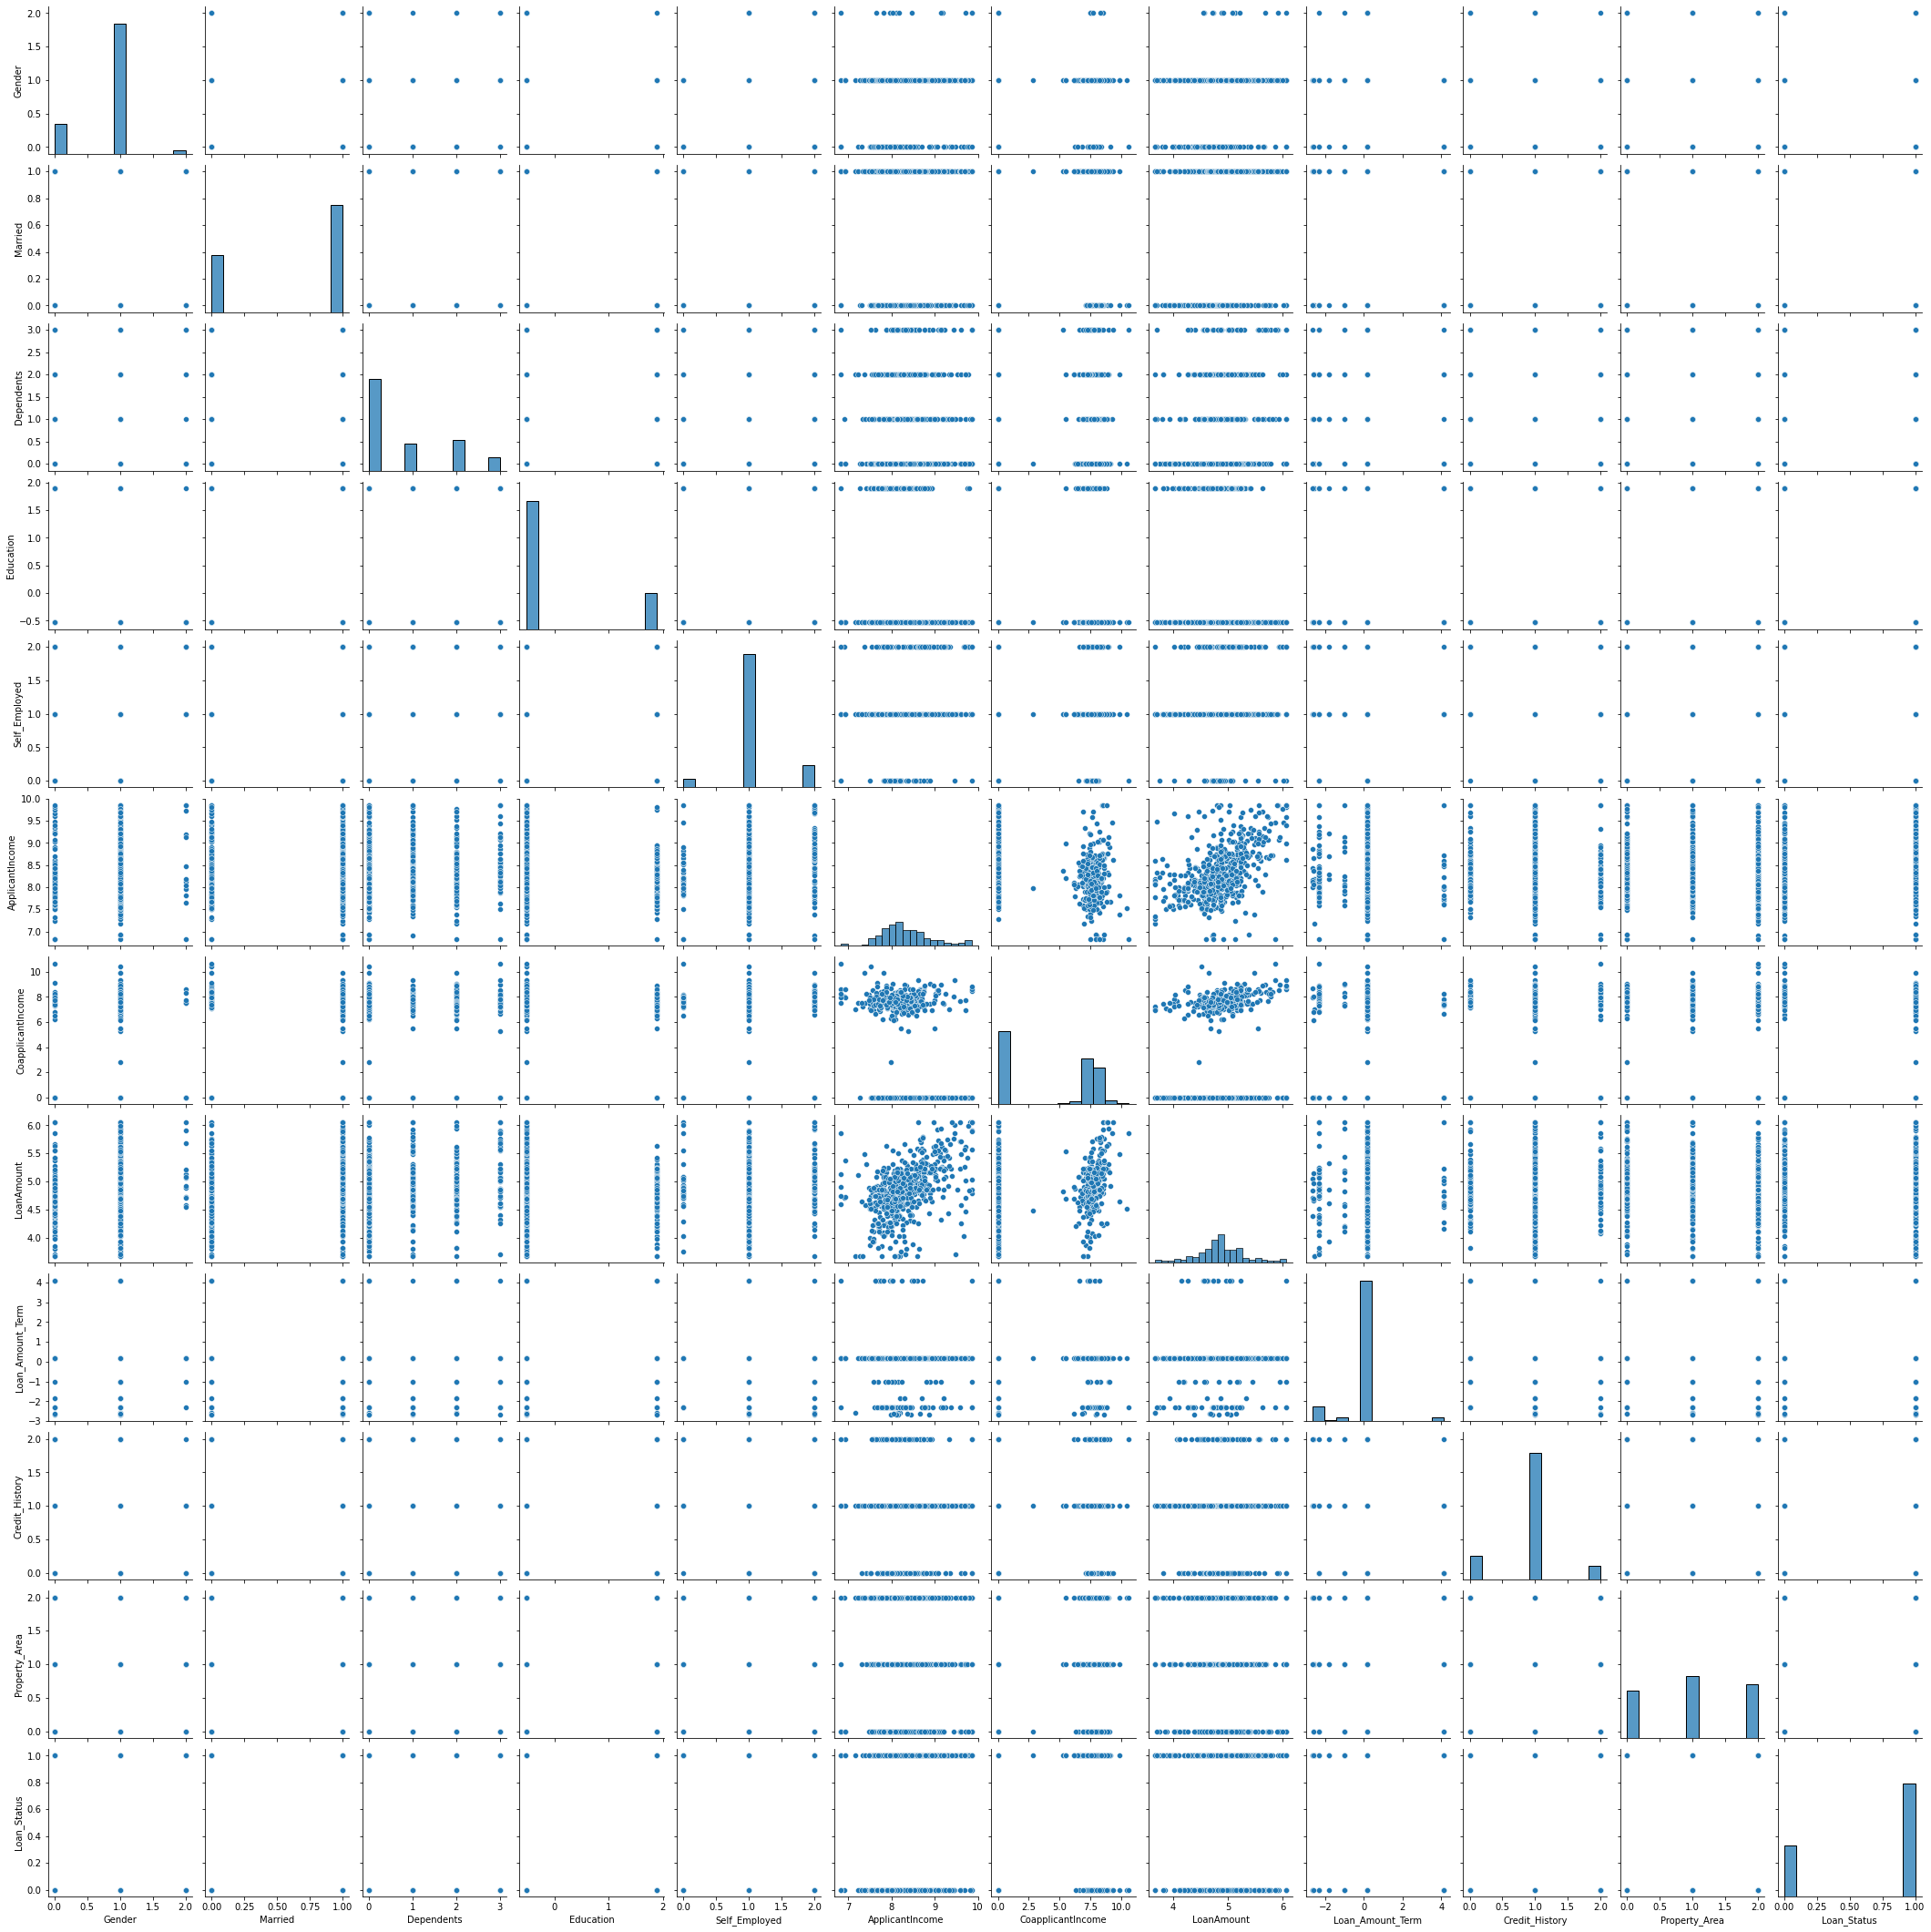

In [62]:
sns.pairplot(df)

Seems only loanamount, applicantincome, coapplicantincome have linear relation


Let us now standardize the data using standardscalar transformation & then Check Multi colinearity using VIF

# Let us now try to predict the Loan_Status using Classification

In [63]:
from sklearn.preprocessing import StandardScaler
x = df.drop(columns=["Loan_Status"])
y=df["Loan_Status"]

scaler=StandardScaler()
x_scaled= scaler.fit_transform(x)

In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scaled,i) for i in range (x_scaled.shape[1])]
vif["features"]=x.columns
vif

,vif,features
0,1.180325,Gender
1,1.402163,Married
2,1.188565,Dependents
3,1.065643,Education
4,1.045546,Self_Employed
5,2.002941,ApplicantIncome
6,1.613678,CoapplicantIncome
7,1.705499,LoanAmount
8,1.040256,Loan_Amount_Term
9,1.014625,Credit_History


None of the vif values are cause of concern, sao we shall now move on to model building

# Model Building

First I shall check the best possible random state to train our model. Using LogisticRegression to check and then later will run with other models

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier

In [67]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=.25,random_state=i)
    mod=LogisticRegression()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best Accuracy is',maxAccu,' on Random state',maxRS)

Best Accuracy is 0.8636363636363636  on Random state 28


In [68]:
#We shall now split the data using the best random state i.e. 28

x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=.20,random_state=28)

In [69]:
lg=LogisticRegression()
sv=SVC(probability=True)
knn=KNeighborsClassifier(n_neighbors=5)
rfc=RandomForestClassifier(n_estimators=100)
dt=DecisionTreeClassifier()
gnb=GaussianNB()
ad=AdaBoostClassifier(n_estimators=100)

In [70]:
model=(lg,sv,knn,rfc,dt,gnb,ad)
for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print('Accuracy score of',m)
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    print('-------------------------------------------------------------------------------------------')

Accuracy score of LogisticRegression()
0.8780487804878049
[[20 15]
 [ 0 88]]
              precision    recall  f1-score   support

           0       1.00      0.57      0.73        35
           1       0.85      1.00      0.92        88

    accuracy                           0.88       123
   macro avg       0.93      0.79      0.82       123
weighted avg       0.90      0.88      0.87       123

-------------------------------------------------------------------------------------------
Accuracy score of SVC(probability=True)
0.8699186991869918
[[20 15]
 [ 1 87]]
              precision    recall  f1-score   support

           0       0.95      0.57      0.71        35
           1       0.85      0.99      0.92        88

    accuracy                           0.87       123
   macro avg       0.90      0.78      0.82       123
weighted avg       0.88      0.87      0.86       123

-------------------------------------------------------------------------------------------
Accurac

Logisticregression followed by SVC are giving the best test accuracy

# Cross Validation
let us check the underfitting and overfitting of the best model using cross validation technique

In [71]:
from sklearn.model_selection import cross_val_score

for m in model:
    score=cross_val_score(m,x_scaled,y,cv=5)
    print('Mean Accuracy of', m)
    print(score.mean())
    print('-------------------------------------------------------------------------------')

Mean Accuracy of LogisticRegression()
0.8062108489937359
-------------------------------------------------------------------------------
Mean Accuracy of SVC(probability=True)
0.8061975209916034
-------------------------------------------------------------------------------
Mean Accuracy of KNeighborsClassifier()
0.7589764094362256
-------------------------------------------------------------------------------
Mean Accuracy of RandomForestClassifier()
0.7752632280421164
-------------------------------------------------------------------------------
Mean Accuracy of DecisionTreeClassifier()
0.7475676396108224
-------------------------------------------------------------------------------
Mean Accuracy of GaussianNB()
0.7736372117819539
-------------------------------------------------------------------------------
Mean Accuracy of AdaBoostClassifier(n_estimators=100)
0.7784886045581768
-------------------------------------------------------------------------------


# ROC_AUC score

AUC Score of LogisticRegression()
0.7857142857142857




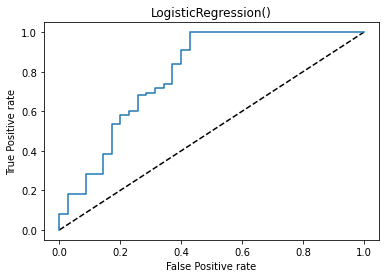



------------------------------------------------------------------------
AUC Score of SVC(probability=True)
0.7800324675324676




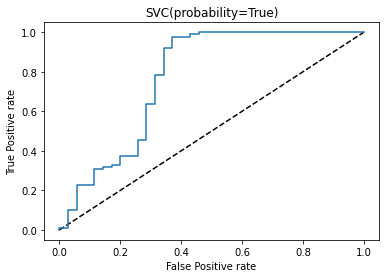



------------------------------------------------------------------------
AUC Score of KNeighborsClassifier()
0.6715909090909091




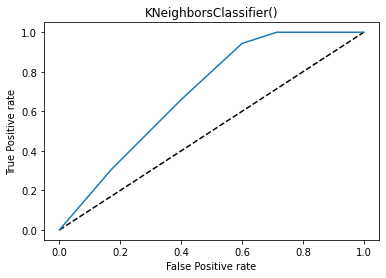



------------------------------------------------------------------------
AUC Score of RandomForestClassifier()
0.7717532467532467




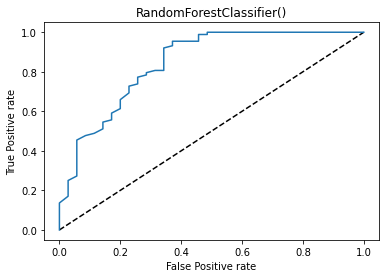



------------------------------------------------------------------------
AUC Score of DecisionTreeClassifier()
0.6949675324675324




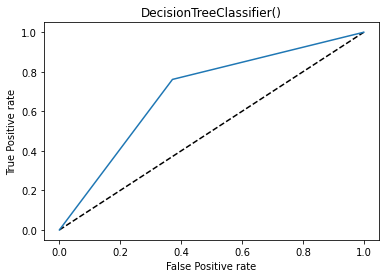



------------------------------------------------------------------------
AUC Score of GaussianNB()
0.7801948051948051




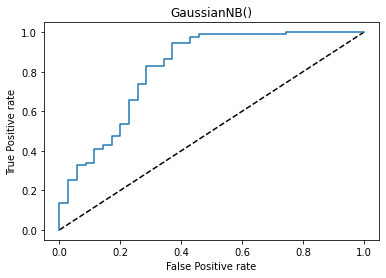



------------------------------------------------------------------------
AUC Score of AdaBoostClassifier(n_estimators=100)
0.706168831168831




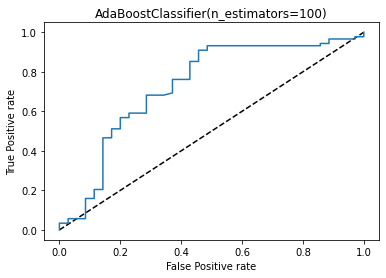



------------------------------------------------------------------------


In [72]:
from sklearn.metrics import roc_curve,roc_auc_score

for m in model:
    y_pred_prob=m.predict_proba(x_test)[:,1]
    fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
    auc_score=roc_auc_score(y_test,m.predict(x_test))
    print('AUC Score of', m)
    print(auc_score)
    print('\n')
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr,label=m)
    plt.xlabel('False Positive rate')
    plt.ylabel('True Positive rate')
    plt.title(m)
    plt.show()
    print('\n')
    print('------------------------------------------------------------------------')


We will now compare all our metrics score to determine the best fitting mode

In [73]:
Performance={'Model':['LogisticRegression','SVC','KNN','RFC','DTC','GNB','ADC'],
            'Test_Accuracy':[88,87,79,82,72,84,76],
            'Cross_val_score':[81,81,76,77,75,77,78],
            'Diffeerence':[88-81,87-81,79-76,82-77,72-75,84-77,76-78],
            'ROC_AUC_score':[78,78,67,77,69,78,71]}

In [74]:
Performance=pd.DataFrame(data=Performance)
Performance

,Model,Test_Accuracy,Cross_val_score,Diffeerence,ROC_AUC_score
0,LogisticRegression,88,81,7,78
1,SVC,87,81,6,78
2,KNN,79,76,3,67
3,RFC,82,77,5,77
4,DTC,72,75,-3,69
5,GNB,84,77,7,78
6,ADC,76,78,-2,71


LR performs the best in all reapects followed by SVC, however for both the model difference between cv score and test accuracy is larger than rhat for KNN which has the lowest difference


Let us use GridSearchCv to find the best parameters 

In [92]:
from sklearn.model_selection import GridSearchCV
parameters={'max_iter':[0.01, 0.1, 1, 10, 100]}


GCV=GridSearchCV(LogisticRegression(),parameters,cv=3,n_jobs=-1,return_train_score=True)

GCV.fit(x_train,y_train)



print(GCV.cv_results_["mean_train_score"].shape)  
print(GCV.cv_results_["mean_test_score"].shape)

print(GCV.cv_results_["mean_train_score"])
print(GCV.cv_results_["mean_test_score"])


(5,)
(5,)
[0.79936165 0.79936165 0.79936165 0.79222918 0.79222918]
[0.78402913 0.78402913 0.78402913 0.79013916 0.79013916]


In [82]:
GCV.best_params_

{'max_iter': 10}

The train and test accuracies have nearly equal values. So the model performs good on both gtraining and test data
Let us now fit the model with the best parameters

In [90]:
Finalmod=LogisticRegression(max_iter=10)
Finalmod.fit(x_train,y_train)
pred=Finalmod.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)
print(classification_report(y_test,pred))

87.8048780487805
              precision    recall  f1-score   support

           0       1.00      0.57      0.73        35
           1       0.85      1.00      0.92        88

    accuracy                           0.88       123
   macro avg       0.93      0.79      0.82       123
weighted avg       0.90      0.88      0.87       123



Trying to improve performance using regularization

In [89]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(x_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)


tuned hpyerparameters :(best parameters)  {'C': 1.0, 'penalty': 'l2'}
accuracy : 0.7860408163265307
              precision    recall  f1-score   support

           0       1.00      0.57      0.73        35
           1       0.85      1.00      0.92        88

    accuracy                           0.88       123
   macro avg       0.93      0.79      0.82       123
weighted avg       0.90      0.88      0.87       123



In [93]:
logreg2=LogisticRegression(C=1,penalty="l2")
logreg2.fit(x_train,y_train)
print("score",logreg2.score(x_test,y_test))

score 0.8780487804878049


Trying to hypertune the parameters using SVC

In [98]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}


GCV=GridSearchCV(SVC(),param_grid,refit = True, verbose = 3)

GCV.fit(x_train,y_train)



#print(GCV.cv_results_["mean_train_score"].shape)  
#print(GCV.cv_results_["mean_test_score"].shape)

# print best parameter after tuning
print(GCV.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(GCV.best_estimator_)

predictions = GCV.predict(x_test)
  
# print classification report
print(classification_report(y_test, predictions))

#print(GCV.cv_results_["mean_train_score"])
#print(GCV.cv_results_["mean_test_score"])

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.677 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.684 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.684 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.684 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.673 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.677 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.684 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.684 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.684 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.673 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.677 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.687 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.806 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.724 total time=   0.0s
[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.714 total time=   0.0s
[CV 5/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.724 total time=   0.0s
[CV 1/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.808 total time=   0.0s
[CV 2/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.806 total time=   0.0s
[CV 3/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.796 total time=   0.0s
[CV 4/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.816 total time=   0.0s
[CV 5/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.704 total time=   0.0s
[CV 1/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.818 total time=   0.0s
[CV 2/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.827 total time=   0.0s
[CV 3/5] END ..C=1000, gamma

LogisticRegression with Hypertuning & regularization giving us the best accuracy 88%, which is the same as the performance of SVC with parameter tuning. So, any of these two can be choosen as the best model in our case

In [99]:
import joblib
joblib.dump(Finalmod,'Loan_model.obj')

['Loan_model.obj']